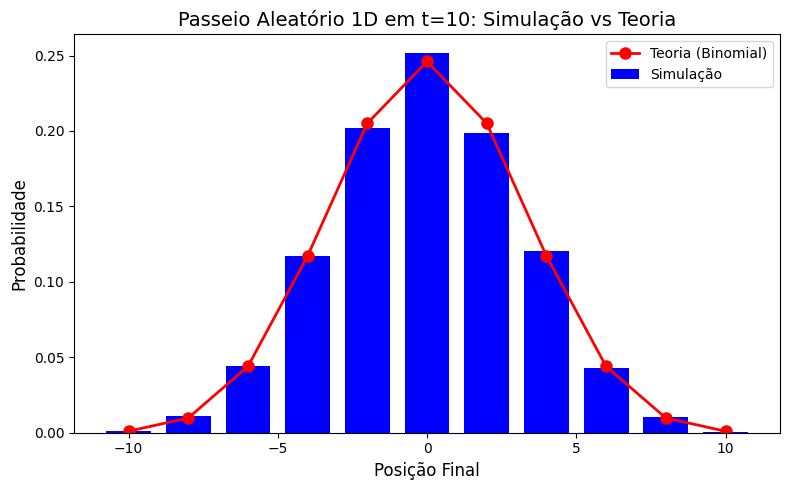

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parâmetros da simulação
n_simulations = 10**4   # Número de simulações
n_steps = 10            # Número de passos (tempo t=10)

# Simulação do passeio aleatório 1D
def random_walk_1d(n_steps):
    """Simula um passeio aleatório 1D com n_steps passos."""
    steps = np.random.choice([-1, 1], size=n_steps)
    return np.sum(steps)

# Executar múltiplas simulações
final_positions = np.array([random_walk_1d(n_steps) for _ in range(n_simulations)])

# Calcular as posições possíveis (sempre pares porque n_steps é par)
possible_positions = np.arange(-n_steps, n_steps + 1, 2)

# Calcular frequências observadas
observed_counts = np.array([np.sum(final_positions == pos) for pos in possible_positions])
observed_probs = observed_counts / n_simulations

# Calcular a distribuição teórica binomial
n = n_steps
k_values = (possible_positions + n) // 2  # Converter posição para número de passos à direita
theoretical_probs = binom.pmf(k_values, n, 0.5)

# Plotar os resultados
plt.figure(figsize=(8,5))
plt.bar(possible_positions, observed_probs, width=1.5, color='blue',label='Simulação')
plt.plot(possible_positions, theoretical_probs, 'ro-', linewidth=2, markersize=8, label='Teoria (Binomial)')

# Configurações do gráfico
plt.title('Passeio Aleatório 1D em t=10: Simulação vs Teoria', fontsize=14)
plt.xlabel('Posição Final', fontsize=12)
plt.ylabel('Probabilidade', fontsize=12)
plt.legend()
plt.tight_layout()
